# Simulación del modelo de Ising

#### Hugo Rivera Morales
#### Física Estadística

In [1]:
# Paqueterias
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [2]:
# Constantes (idk what units are used XD)
# length of the lattice
length = 10
# ???
J = 1.0
# Cte de Boltzmann
kB = 1.0 # This will help to set the units
# Other stuff
sites = list()
spins = dict()
nbhs = defaultdict(list)

El hamiltoniano del modelo de Ising:

$$
H = -\sum_{\langle i,j \rangle} J\sigma_i\sigma_j
$$

1) $H$ es el hamiltoniano del sistema.

2) $\sum_{\langle i,j \rangle}$ denota una suma sobre partículas vecinas entre sí.

3) $\sigma _{i}$ es el espín de la partícula i-ésima, que puede tomar sólo dos valores, +1 y -1.

4) $J$ es el factor de escala entre interacción entre espines y energía.

In [3]:
# Crear la lattice
for x, y in itertools.product(range(length), range(length)):
    sites.append((x,y))
print(sites)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


In [4]:
# Asignar spin (+,-) a cada pt. de la lattice
def random_configuration():
    for spin in sites:
        spins[spin] = np.random.choice([-1, 1])
random_configuration()
print(spins)

{(0, 0): 1, (0, 1): 1, (0, 2): 1, (0, 3): 1, (0, 4): 1, (0, 5): -1, (0, 6): -1, (0, 7): 1, (0, 8): 1, (0, 9): 1, (1, 0): 1, (1, 1): 1, (1, 2): 1, (1, 3): -1, (1, 4): 1, (1, 5): -1, (1, 6): -1, (1, 7): -1, (1, 8): 1, (1, 9): 1, (2, 0): 1, (2, 1): -1, (2, 2): 1, (2, 3): 1, (2, 4): -1, (2, 5): 1, (2, 6): -1, (2, 7): 1, (2, 8): -1, (2, 9): -1, (3, 0): -1, (3, 1): -1, (3, 2): 1, (3, 3): -1, (3, 4): -1, (3, 5): 1, (3, 6): -1, (3, 7): -1, (3, 8): 1, (3, 9): -1, (4, 0): 1, (4, 1): -1, (4, 2): 1, (4, 3): 1, (4, 4): 1, (4, 5): -1, (4, 6): 1, (4, 7): 1, (4, 8): -1, (4, 9): -1, (5, 0): -1, (5, 1): -1, (5, 2): -1, (5, 3): 1, (5, 4): -1, (5, 5): 1, (5, 6): -1, (5, 7): 1, (5, 8): -1, (5, 9): -1, (6, 0): 1, (6, 1): 1, (6, 2): 1, (6, 3): -1, (6, 4): -1, (6, 5): 1, (6, 6): -1, (6, 7): 1, (6, 8): 1, (6, 9): 1, (7, 0): 1, (7, 1): 1, (7, 2): -1, (7, 3): 1, (7, 4): 1, (7, 5): -1, (7, 6): 1, (7, 7): -1, (7, 8): -1, (7, 9): -1, (8, 0): -1, (8, 1): -1, (8, 2): 1, (8, 3): 1, (8, 4): -1, (8, 5): 1, (8, 6): -1, (

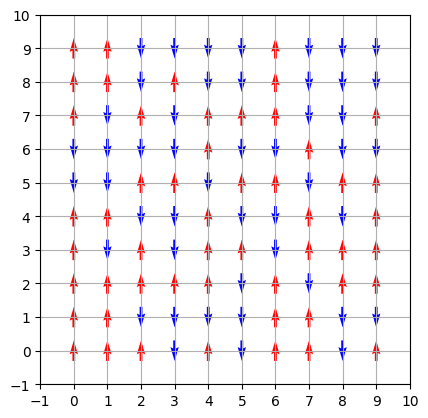

In [5]:
# Plot de la lattice con spin
def plot_spins():
    plt.figure()
    colors = {1: "red", -1: "blue"}
    for site, spin in spins.items():
        x, y = site
        plt.quiver(x, y, 0, spin, pivot="middle", color=colors[spin])
    plt.xticks(range(-1,length+1))
    plt.yticks(range(-1,length+1))
    plt.gca().set_aspect("equal")
    plt.grid()
    plt.show
plot_spins()

In [6]:
# Definición de variables
nbhs = defaultdict(list)
for site in spins:
    x, y = site
    if x + 1 < length:
        nbhs[site].append(((x + 1) % length, y))
    if x - 1 >= 0:
        nbhs[site].append(((x - 1) % length, y))
    if y + 1 < length:
        nbhs[site].append((x, (y + 1) % length))
    if y - 1 >= 0:
        nbhs[site].append((x, (y - 1) % length))
# Energía
def energy_site(site):
    energy = 0.0
    for nbh in nbhs[site]:
        energy += spins[site] * spins[nbh]
    return -J * energy
# Energía total del system
def total_energy():
    energy = 0.0
    for site in sites:
        energy += energy_site(site)
    return 0.5 * energy
# Magnetization
def magnetization():
    mag = 0.0
    for spin in spins.values():
        mag += spin
    return mag

print("Magnetización inicial = ", magnetization())
print("Energía inicial = ", total_energy())

Magnetización inicial =  4.0
Energía inicial =  12.0


Magnetización final =  -100.0
Energía final =  -180.0


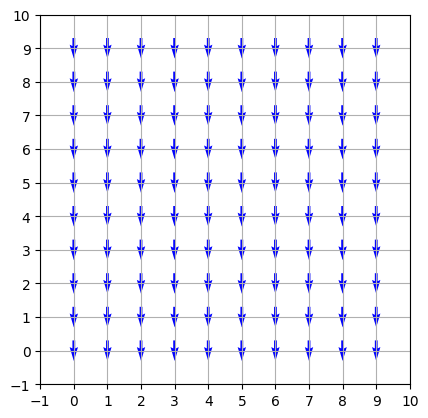

In [7]:
# Metodo de Metropolis y Monte Carlo
def metropolis(site, T):
    oldSpin = spins[site]
    oldEnergy = energy_site(site)
    spins[site] *= -1
    newEnergy = energy_site(site)
    deltaE = newEnergy - oldEnergy
    if deltaE <= 0:
        pass
    else:
        if np.random.uniform(0, 1) <= np.exp(-deltaE/(kB*T)):
            pass
        else:
            spins[site] *= -1
# Monte Carlo
def monte_carlo_step(T):
    for i in range(len(sites)):
        int_rand_site = np.random.randint(0, len(sites))
        rand_site = sites[int_rand_site]
        metropolis(rand_site, T)

# Variables del método
amount_mcs = 10000
# Rango de las temperaturas
T_high = 5.0
T_low = 0.01
# Pasos
step = -0.1
# Rango de temperatura
temps = np.arange(T_high, T_low, step)
# Array para energía
energies = np.zeros(shape=(len(temps), amount_mcs))
# Array para magnetization
magnetizations = np.zeros(shape=(len(temps), amount_mcs))

# Compute the energy and magnetization
random_configuration()
for ind_T, T in enumerate(temps):
    for i in range(amount_mcs):
        monte_carlo_step(T)
        energies[ind_T, i] = total_energy()
        magnetizations[ind_T, i] = magnetization()

# Plot del final system
plot_spins()
print("Magnetización final = ", magnetization())
print("Energía final = ", total_energy())

In [8]:
# Definición para los plot
tau = amount_mcs // 2
# Energía media
energy_mean = np.mean(energies[:, tau:], axis=1)
# Magnetización media
magnetization_mean = abs(np.mean(magnetizations[:, tau:], axis=1))
# Magnetización standard
magnetization_std = np.std(np.abs(magnetizations[:, tau:]), axis=1)
# Susceptibility
susceptibility = magnetization_std ** 2 / (kB * temps)
# Energía standard
energy_std = np.std(energies[:, tau:], axis=1)
# Specific heat
specific_heat = energy_std ** 2 / (kB * temps * temps)

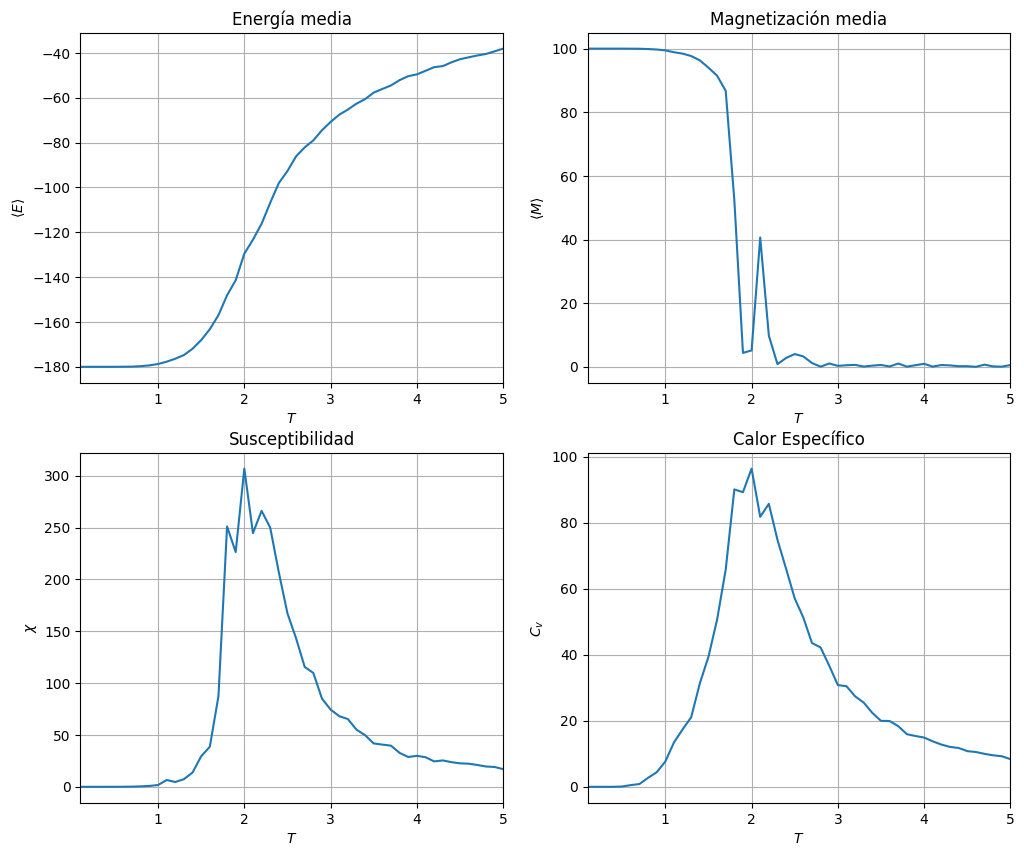

In [10]:
# Plots
figure, fig = plt.subplots(2,2)
# Energía media
fig[0,0].plot(temps, energy_mean, label="Energía media")
fig[0,0].set_title(r'Energía media')
fig[0,0].set_xlabel(r"$T$")
fig[0,0].set_ylabel(r"$\left<E\right>$")
fig[0,0].set_xlim(min(temps),max(temps))
fig[0,0].grid(True)
# Magnetización media
fig[0,1].plot(temps, magnetization_mean, label="Energía media")
fig[0,1].set_title(r'Magnetización media')
fig[0,1].set_xlabel(r"$T$")
fig[0,1].set_ylabel(r"$\left<M\right>$")
fig[0,1].set_xlim(min(temps),max(temps))
fig[0,1].grid(True)
# Susceptibilidad
fig[1,0].plot(temps, susceptibility, label="Calor Específico")
fig[1,0].set_title(r'Susceptibilidad')
fig[1,0].set_xlabel(r"$T$")
fig[1,0].set_ylabel(r"$\chi$")
fig[1,0].set_xlim(min(temps),max(temps))
fig[1,0].grid(True)
# Capacidad calorífica
fig[1,1].plot(temps, specific_heat, label="Calor Específico")
fig[1,1].set_title(r'Calor Específico')
fig[1,1].set_xlabel(r"$T$")
fig[1,1].set_ylabel(r"$C_v$")
fig[1,1].set_xlim(min(temps),max(temps))
fig[1,1].grid(True)

plt.rcParams["figure.figsize"] = (12,10)
plt.show()